In [1]:
import numpy as np
import networkx as nx
import itertools
import time
import matplotlib.pyplot as plt
import pandas as pd

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [2]:
def manhattanDistance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

In [3]:
pointsInfo = pd.read_table('manhattan.txt', sep=',', header=None, names=['x', 'y'])
pointsInfo['x'] = pointsInfo['x'].apply(lambda x: float(x.split('(')[1]))
pointsInfo['y'] = pointsInfo['y'].apply(lambda x: float(x.split(')')[0]))
pointsInfo.head()

,x,y
0,6.54,6.77
1,3.28,9.17
2,9.22,9.17
3,6.53,8.29
4,2.25,7.82


In [4]:
G = nx.Graph()
for index, r in pointsInfo.iterrows():
    G.add_node(index, x=r['x'], y=r['y'])

for ind1, r1 in pointsInfo.iterrows():
    for ind2, r2 in pointsInfo.iterrows():
        G.add_edge(
            ind1, 
            ind2, 
            weight=manhattanDistance(list(G.nodes[ind1].values()), list(G.nodes[ind2].values()))
        )

In [5]:
positions = [tuple(i[1].values()) for i in G.nodes.data()]
labels = [i[0] for i in G.nodes.data()]

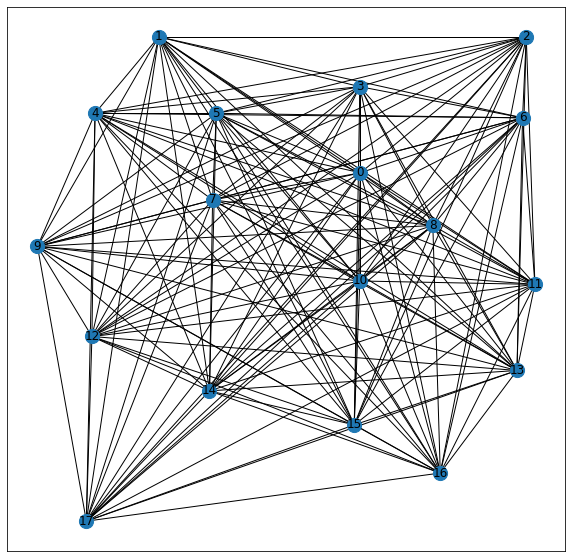

In [6]:
nx.draw_networkx_nodes(G, positions, node_size=200)
nx.draw_networkx(G, positions, node_size=100, label=labels)

In [19]:
%%time
msTree = nx.minimum_spanning_tree(G, 'weight')
msTreeCopy = nx.Graph()
for i, j, w in msTree.edges(data=True):
    msTreeCopy.add_edge(i, j, weight=w)
    
    
MG = nx.MultiGraph()
MG.add_edges_from(msTreeCopy.edges())
MG.add_edges_from(msTree.edges())

circuit = list(nx.eulerian_circuit(MG))
multitour = [item[0] for item in circuit]


tour = []
for i in multitour:
    if i not in tour:
        tour.append(i)
print(tour)


n = len(tour)
G_final = nx.Graph()
for i in range(n - 1):
    G_final.add_edge(tour[i], tour[i+1])
G_final.add_edge(tour[n - 1], tour[0])

[0, 8, 11, 13, 6, 2, 10, 15, 16, 14, 12, 17, 9, 3, 5, 7, 4, 1]
CPU times: user 4.94 ms, sys: 2.64 ms, total: 7.58 ms
Wall time: 8.43 ms


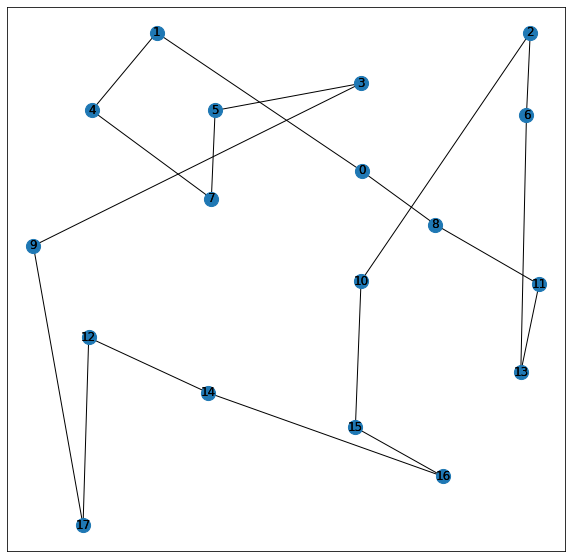

In [13]:
nx.draw_networkx(G_final, positions, node_size=200)
nx.draw_networkx_labels(G_final, positions, node_size=50, label=labels)
plt.show()

In [15]:
total_weight = 0
for i in range(n - 1):
    total_weight = total_weight + G.edges[tour[i],tour[i+1]]['weight']

total_weight = total_weight + G.edges[tour[0],tour[n - 1]]['weight']

In [16]:
total_weight

65.42

In [17]:
def run_greedy_TSP(G, pos,should_print):   

    start_time = time.time()
    
    n=nx.number_of_nodes(G)
    tour=[0]
    nr_cities=0
    length_tour=0


    while nr_cities<n-1:
        min_weight=999999
        candidate=-1
        for i in range(0,n):
            if (i not in tour):
                if G.edges[tour[nr_cities],i]['weight']< min_weight:
                    min_weight=G.edges[tour[nr_cities],i]['weight']
                    candidate=i
        tour.append(candidate)
        nr_cities=nr_cities+1
        length_tour=length_tour+min_weight

# don't forget we have to come back to the first node
    
    length_tour=length_tour+G.edges[0,tour[n-1]]['weight']
    
    final_time=time.time() - start_time

# if should_print=1, we plot the tour


    if should_print == 1:
        print(" **** Greedy Algorithm ***")
        print("")
        print("")
        G_final=nx.Graph()
        for i in range(n-1):
            G_final.add_edge(tour[i],tour[i+1])
        G_final.add_edge(tour[0],tour[n-1])

            
        nx.draw_networkx_labels(G_final,pos,node_size=100,label=range(n))
        nx.draw_networkx(G_final,pos,node_size=200)
        plt.show()

# uncomment this if you want the tour and its cost to be output
            
    print ("The greedy tour is %s and its total length is %f" % (tour,length_tour))
    print("Running time of the greedy algorithm: %s seconds" % final_time) 
    print("")

    
    return length_tour # returns the total weight of the tour

 **** Greedy Algorithm ***




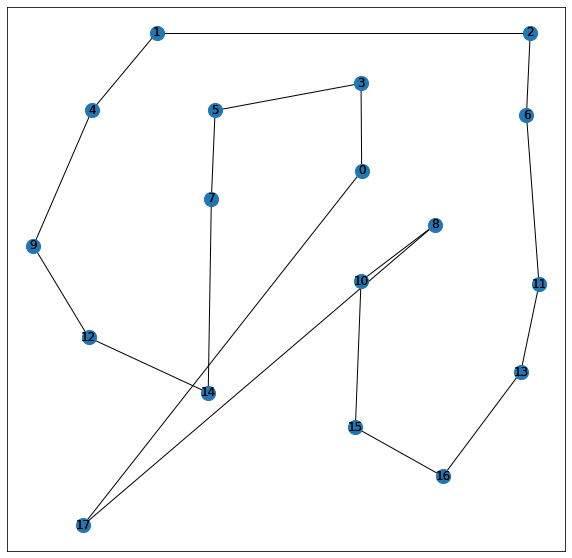

The greedy tour is [0, 3, 5, 7, 14, 12, 9, 4, 1, 2, 6, 11, 13, 16, 15, 10, 8, 17] and its total length is 64.180000
Running time of the greedy algorithm: 0.0005257129669189453 seconds

CPU times: user 713 ms, sys: 211 ms, total: 924 ms
Wall time: 627 ms


64.18

In [20]:
%%time
run_greedy_TSP(G, positions, True)